In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')
df.head()

,Id,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,0,2033-03-01,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
1,1,2033-03-01,114.571843,114.409664,112.921505,113.066659,87.844722,8592865,Company_1
2,2,2033-03-01,50.984499,51.262529,50.266272,50.094499,49.329834,25085661,Company_2
3,3,2033-03-01,98.585428,99.988079,97.867719,98.811966,91.784469,823271,Company_3
4,4,2033-03-01,8874.646107,8935.704765,8811.247764,8873.173069,8407.389386,609369,Company_4


In [4]:
df_pivoted=df.pivot( index='Date', columns='Company',values=['Open','High','Low','Volume','Adj Close','Close'])
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]
df_pivoted.reset_index(inplace=True)
df_pivoted.head()

,Date,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,...,Adj Close_Company_2,Adj Close_Company_3,Adj Close_Company_4,Adj Close_Company_5,Close_Company_0,Close_Company_1,Close_Company_2,Close_Company_3,Close_Company_4,Close_Company_5
0,2033-03-01,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,...,49.329834,91.784469,8407.389386,105.356425,161.915062,113.066659,50.094499,98.811966,8873.173069,135.882546
1,2033-03-05,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,...,49.927823,89.513635,8333.361605,105.455415,163.108507,110.561246,49.250071,96.594597,8794.758109,135.970813
2,2033-03-06,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,...,49.937149,86.676999,8163.464754,105.169763,161.716298,109.651386,48.878616,93.602065,8616.178598,136.070561
3,2033-03-07,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,...,47.539717,84.275840,8223.307353,104.904857,148.051907,109.723772,48.670564,90.718080,8679.165970,135.772818
4,2033-03-08,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,...,47.622623,84.868218,8270.636561,106.500629,148.483368,109.118052,47.642654,90.771456,8729.613528,137.854360


# New Section

In [5]:
df1=df_pivoted[['Close_Company_'+str(i) for i in range(6)]]
df1.head()

,Close_Company_0,Close_Company_1,Close_Company_2,Close_Company_3,Close_Company_4,Close_Company_5
0,161.915062,113.066659,50.094499,98.811966,8873.173069,135.882546
1,163.108507,110.561246,49.250071,96.594597,8794.758109,135.970813
2,161.716298,109.651386,48.878616,93.602065,8616.178598,136.070561
3,148.051907,109.723772,48.670564,90.718080,8679.165970,135.772818
4,148.483368,109.118052,47.642654,90.771456,8729.613528,137.854360


In [6]:
company_columns = {
    'Company_0': ['Date', 'Open_Company_0', 'High_Company_0', 'Close_Company_0', 'Adj Close_Company_0', 'Low_Company_0', 'Volume_Company_0'],
}

# Replicate columns for other companies
for i in range(1, 6):
    source_company = 'Company_0'
    target_company = f'Company_{i}'

    # Create a new list of columns for the target company by replacing the company number
    target_columns = [col.replace(source_company, target_company) for col in company_columns[source_company]]

    # Add the new columns to the dictionary
    company_columns[target_company] = target_columns

# Create separate DataFrames for each company
company_dataframes = {}
for company, columns in company_columns.items():
    company_dataframes[company] = df_pivoted[columns].copy()
    company_dataframes[company].set_index('Date', inplace=True)

df_company_1 = company_dataframes['Company_1']
print(df_company_1)

            Open_Company_1  High_Company_1  Close_Company_1  \
Date                                                          
2033-03-01      114.571843      114.409664       113.066659   
2033-03-05      113.266631      113.161314       110.561246   
2033-03-06      110.756424      112.339453       109.651386   
2033-03-07      109.827335      111.136768       109.723772   
2033-03-08      111.168595      111.415207       109.118052   
...                    ...             ...              ...   
2038-02-22       95.550417       95.666937        95.343456   
2038-02-23       97.626887       98.685617        98.352903   
2038-02-24       98.389125      104.179347       103.677731   
2038-02-27      104.063137      105.707698       103.974218   
2038-02-28      104.074758      104.325097       102.070115   

            Adj Close_Company_1  Low_Company_1  Volume_Company_1  
Date                                                              
2033-03-01            87.844722     112.921505

In [7]:
companies = ["Company_0", "Company_1", "Company_2", "Company_3", "Company_4", "Company_5"]

In [8]:
def create_dataset(dataset, time_step=1, num_features=1):
            dataX, dataY = [], []

            for i in range(len(dataset) - time_step - 1):
                a = dataset[i:(i + time_step), :]
                dataX.append(a)
                dataY.append(dataset[i + time_step, :])

            return np.array(dataX), np.array(dataY)

Column: Company_0
X_train Shape : (776, 150, 6)
y_train Shape : (776,)
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.0126
Epoch 1: val_loss improved from inf to 0.00366, saving model to model_checkpoint_Company_0.h5
25/25 [==============================] - 11s 290ms/step - loss: 0.0126 - val_loss: 0.0037
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.0028
Epoch 2: val_loss improved from 0.00366 to 0.00354, saving model to model_checkpoint_Company_0.h5
25/25 [==============================] - 7s 269ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.0020
Epoch 3: val_loss improved from 0.00354 to 0.00319, saving model to model_checkpoint_Company_0.h5
25/25 [==============================] - 6s 223ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.0023
Epoch 4: val_loss did not improve from 0.00319
25/25 [==============================] - 7s 269ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 0.0021
Epoch 5: val_loss improved from 0.00319 to 0.00304, saving model to model_checkpoint_Company_0.h5
25/25 [==============================] - 6s 225ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 6/100

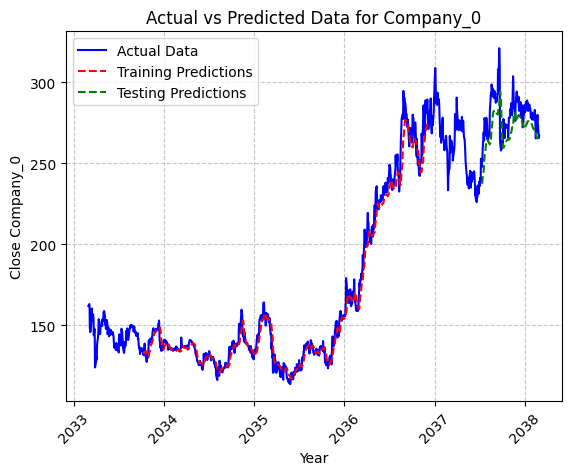

Company_0 RMSE : 13.240324807386708
1/1 [==============================] - 0s 77ms/step
Prediction 1: 0.7358301281929016
1/1 [==============================] - 0s 82ms/step
Prediction 2: 0.7347142696380615
1/1 [==============================] - 0s 77ms/step
Prediction 3: 0.7347550988197327
1/1 [==============================] - 0s 75ms/step
Prediction 4: 0.7353633642196655
1/1 [==============================] - 0s 76ms/step
Prediction 5: 0.7339919209480286
1/1 [==============================] - 0s 75ms/step
Prediction 6: 0.7297677397727966
1/1 [==============================] - 0s 85ms/step
Prediction 7: 0.7272952198982239
1/1 [==============================] - 0s 79ms/step
Prediction 8: 0.7269570231437683
1/1 [==============================] - 0s 80ms/step
Prediction 9: 0.7278800010681152
1/1 [==============================] - 0s 76ms/step
Prediction 10: 0.7275618314743042
1/1 [==============================] - 0s 74ms/step
Prediction 11: 0.7249075174331665
1/1 [======================

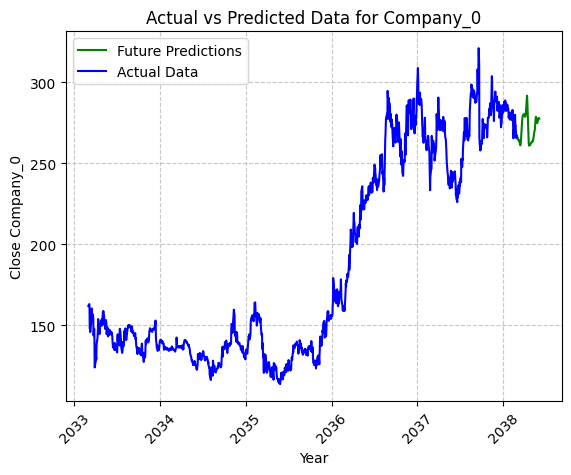

Column: Company_1
X_train Shape : (776, 150, 6)
y_train Shape : (776,)
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.0356
Epoch 1: val_loss improved from inf to 0.00951, saving model to model_checkpoint_Company_1.h5
25/25 [==============================] - 10s 255ms/step - loss: 0.0356 - val_loss: 0.0095
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.0066
Epoch 2: val_loss improved from 0.00951 to 0.00178, saving model to model_checkpoint_Company_1.h5
25/25 [==============================] - 7s 273ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.0053
Epoch 3: val_loss improved from 0.00178 to 0.00128, saving model to model_checkpoint_Company_1.h5
25/25 [==============================] - 6s 228ms/step - loss: 0.0053 - val_loss: 0.0013
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.0047
Epoch 4: val_loss did not improve from 0.00128
25/25 [==============================] - 7s 282ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 0.0039
Epoch 5: val_loss did not improve from 0.00128
25/25 [==============================] - 6s 229ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 6/100
25/25 [==============================] - ETA: 0s -

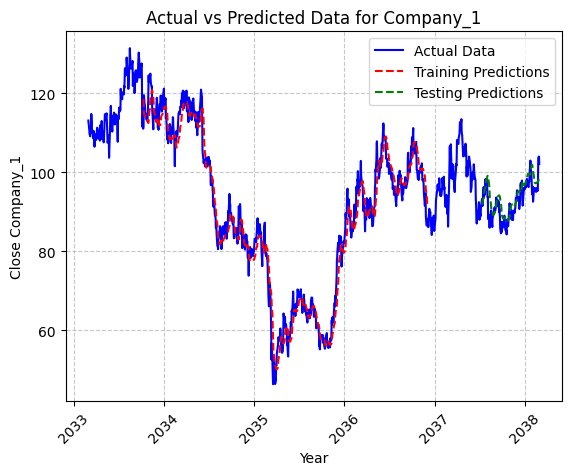

Company_1 RMSE : 3.196966679238918
1/1 [==============================] - 0s 48ms/step
Prediction 1: 0.6135597229003906
1/1 [==============================] - 0s 49ms/step
Prediction 2: 0.6166802048683167
1/1 [==============================] - 0s 55ms/step
Prediction 3: 0.6171940565109253
1/1 [==============================] - 0s 48ms/step
Prediction 4: 0.6177036166191101
1/1 [==============================] - 0s 51ms/step
Prediction 5: 0.6183690428733826
1/1 [==============================] - 0s 52ms/step
Prediction 6: 0.6193961501121521
1/1 [==============================] - 0s 54ms/step
Prediction 7: 0.6209275126457214
1/1 [==============================] - 0s 54ms/step
Prediction 8: 0.6229342818260193
1/1 [==============================] - 0s 88ms/step
Prediction 9: 0.6257383823394775
1/1 [==============================] - 0s 80ms/step
Prediction 10: 0.6263446807861328
1/1 [==============================] - 0s 71ms/step
Prediction 11: 0.6237414479255676
1/1 [=======================

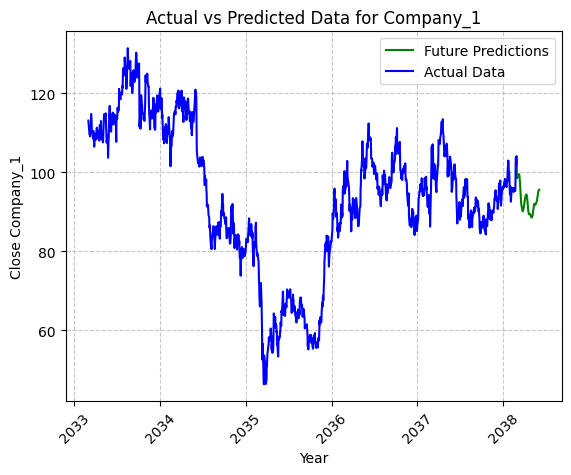

Column: Company_2
X_train Shape : (776, 150, 6)
y_train Shape : (776,)
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.0047
Epoch 1: val_loss improved from inf to 0.00022, saving model to model_checkpoint_Company_2.h5
25/25 [==============================] - 10s 255ms/step - loss: 0.0047 - val_loss: 2.1659e-04
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.0011
Epoch 2: val_loss improved from 0.00022 to 0.00020, saving model to model_checkpoint_Company_2.h5
25/25 [==============================] - 8s 307ms/step - loss: 0.0011 - val_loss: 1.9777e-04
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 9.7981e-04
Epoch 3: val_loss improved from 0.00020 to 0.00014, saving model to model_checkpoint_Company_2.h5
25/25 [==============================] - 6s 236ms/step - loss: 9.7981e-04 - val_loss: 1.3697e-04
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 9.5052e-04
Epoch 4: val_loss improved from 0.00014 to 0.00013, saving model to model_checkpoint_Company_2.h5
25/25 [==============================] - 7s 274ms/step - loss: 9.5052e-04 - val_loss: 1.3275e-04
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 7.4034e-04
Epoch 5: val_loss did not improve from 0.00013
25/25 [==============================] - 6s 230ms/step - loss: 7.403

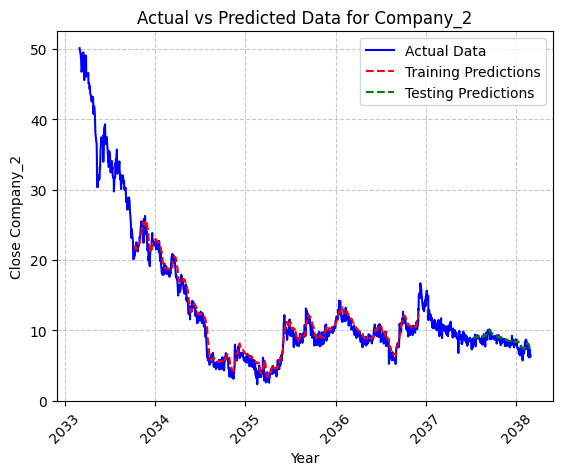

Company_2 RMSE : 0.5255666616811422
1/1 [==============================] - 0s 53ms/step
Prediction 1: 0.10200604796409607
1/1 [==============================] - 0s 59ms/step
Prediction 2: 0.10398644208908081
1/1 [==============================] - 0s 92ms/step
Prediction 3: 0.108064666390419
1/1 [==============================] - 0s 71ms/step
Prediction 4: 0.11241205036640167
1/1 [==============================] - 0s 75ms/step
Prediction 5: 0.11667943000793457
1/1 [==============================] - 0s 78ms/step
Prediction 6: 0.12107393890619278
1/1 [==============================] - 0s 83ms/step
Prediction 7: 0.124073825776577
1/1 [==============================] - 0s 76ms/step
Prediction 8: 0.1255742311477661
1/1 [==============================] - 0s 75ms/step
Prediction 9: 0.1273990124464035
1/1 [==============================] - 0s 74ms/step
Prediction 10: 0.130629301071167
1/1 [==============================] - 0s 76ms/step
Prediction 11: 0.13414321839809418
1/1 [===================

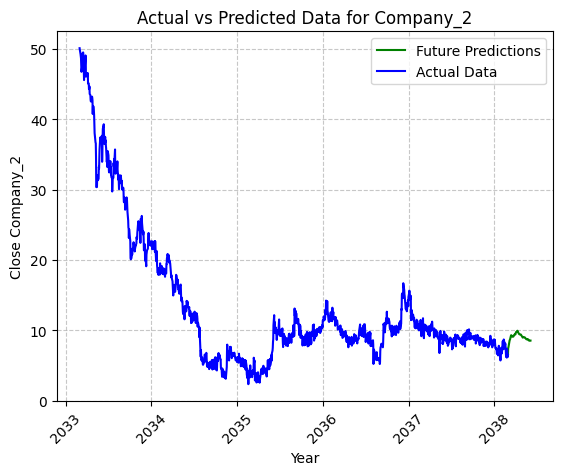

Column: Company_3
X_train Shape : (776, 150, 6)
y_train Shape : (776,)
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.0330
Epoch 1: val_loss improved from inf to 0.00578, saving model to model_checkpoint_Company_3.h5
25/25 [==============================] - 10s 259ms/step - loss: 0.0330 - val_loss: 0.0058
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.0035
Epoch 2: val_loss improved from 0.00578 to 0.00313, saving model to model_checkpoint_Company_3.h5
25/25 [==============================] - 7s 280ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.0025
Epoch 3: val_loss improved from 0.00313 to 0.00279, saving model to model_checkpoint_Company_3.h5
25/25 [==============================] - 6s 235ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.0025
Epoch 4: val_loss improved from 0.00279 to 0.00231, saving model to model_checkpoint_Company_3.h5
25/25 [==============================] - 7s 278ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 0.0021
Epoch 5: val_loss did not improve from 0.00231
25/25 [==============================] - 6s 232ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/100

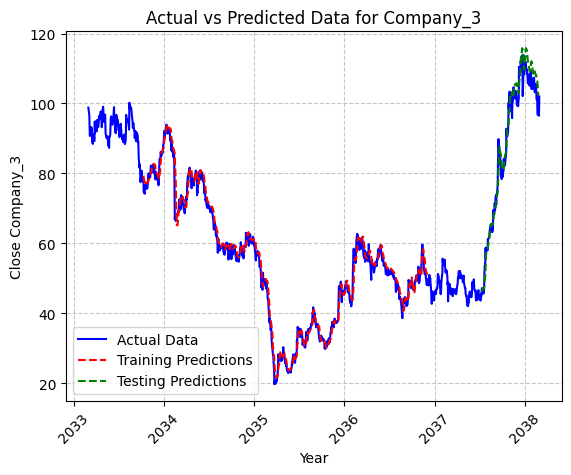

Company_3 RMSE : 3.498549526189715
1/1 [==============================] - 0s 47ms/step
Prediction 1: 0.8755044937133789
1/1 [==============================] - 0s 53ms/step
Prediction 2: 0.776602029800415
1/1 [==============================] - 0s 55ms/step
Prediction 3: 0.6588522791862488
1/1 [==============================] - 0s 49ms/step
Prediction 4: 0.5541817545890808
1/1 [==============================] - 0s 53ms/step
Prediction 5: 0.48429256677627563
1/1 [==============================] - 0s 54ms/step
Prediction 6: 0.4219622015953064
1/1 [==============================] - 0s 54ms/step
Prediction 7: 0.38028278946876526
1/1 [==============================] - 0s 71ms/step
Prediction 8: 0.359809547662735
1/1 [==============================] - 0s 51ms/step
Prediction 9: 0.3555537760257721
1/1 [==============================] - 0s 55ms/step
Prediction 10: 0.36350300908088684
1/1 [==============================] - 0s 57ms/step
Prediction 11: 0.37715548276901245
1/1 [=====================

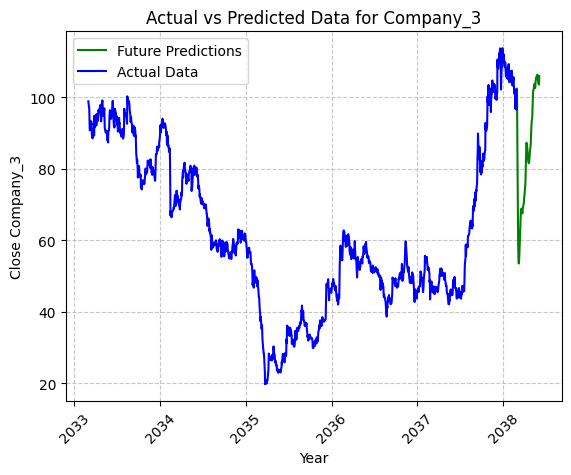

Column: Company_4
X_train Shape : (776, 150, 6)
y_train Shape : (776,)
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.0245
Epoch 1: val_loss improved from inf to 0.00157, saving model to model_checkpoint_Company_4.h5
25/25 [==============================] - 10s 266ms/step - loss: 0.0245 - val_loss: 0.0016
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.0046
Epoch 2: val_loss did not improve from 0.00157
25/25 [==============================] - 7s 276ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.0039
Epoch 3: val_loss did not improve from 0.00157
25/25 [==============================] - 6s 257ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.0033
Epoch 4: val_loss did not improve from 0.00157
5/5 [==============================] - 1s 148ms/step


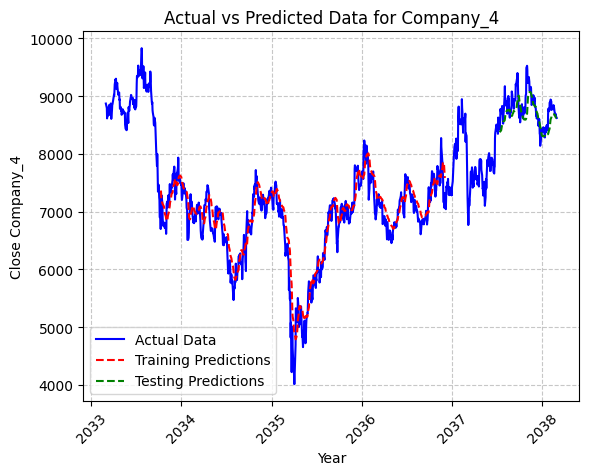

Company_4 RMSE : 255.67215772336385
1/1 [==============================] - 0s 64ms/step
Prediction 1: 0.78367680311203
1/1 [==============================] - 0s 52ms/step
Prediction 2: 0.7817912697792053
1/1 [==============================] - 0s 52ms/step
Prediction 3: 0.7808261513710022
1/1 [==============================] - 0s 52ms/step
Prediction 4: 0.7795974016189575
1/1 [==============================] - 0s 56ms/step
Prediction 5: 0.777298092842102
1/1 [==============================] - 0s 52ms/step
Prediction 6: 0.7752314805984497
1/1 [==============================] - 0s 54ms/step
Prediction 7: 0.7740117311477661
1/1 [==============================] - 0s 52ms/step
Prediction 8: 0.7738590240478516
1/1 [==============================] - 0s 51ms/step
Prediction 9: 0.7756426930427551
1/1 [==============================] - 0s 58ms/step
Prediction 10: 0.7795022130012512
1/1 [==============================] - 0s 53ms/step
Prediction 11: 0.7838870286941528
1/1 [=========================

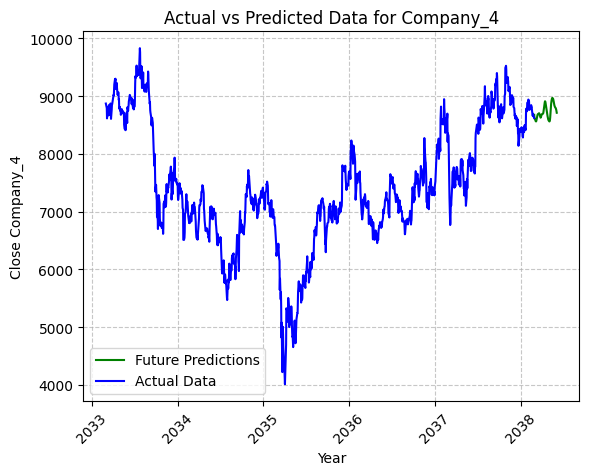

Column: Company_5
X_train Shape : (776, 150, 6)
y_train Shape : (776,)
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.0163
Epoch 1: val_loss improved from inf to 0.00319, saving model to model_checkpoint_Company_5.h5
25/25 [==============================] - 9s 257ms/step - loss: 0.0163 - val_loss: 0.0032
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.0035
Epoch 2: val_loss improved from 0.00319 to 0.00149, saving model to model_checkpoint_Company_5.h5
25/25 [==============================] - 7s 278ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.0027
Epoch 3: val_loss did not improve from 0.00149
25/25 [==============================] - 6s 232ms/step - loss: 0.0027 - val_loss: 0.0046
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.0025
Epoch 4: val_loss did not improve from 0.00149
25/25 [==============================] - 7s 279ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 0.0023
Epoch 5: val_loss improved from 0.00149 to 0.00123, saving model to model_checkpoint_Company_5.h5
25/25 [==============================] - 6s 240ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 6/100
25/25 [==============================] - ETA: 0s -

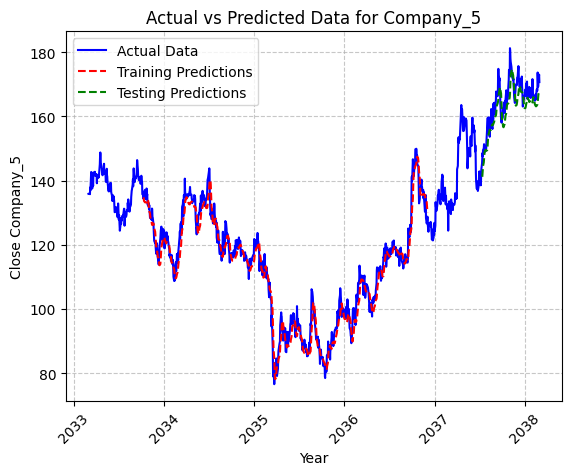

Company_5 RMSE : 4.476005159878968
1/1 [==============================] - 0s 53ms/step
Prediction 1: 0.8694735169410706
1/1 [==============================] - 0s 60ms/step
Prediction 2: 0.8551012277603149
1/1 [==============================] - 0s 57ms/step
Prediction 3: 0.8320133686065674
1/1 [==============================] - 0s 59ms/step
Prediction 4: 0.8056709170341492
1/1 [==============================] - 0s 58ms/step
Prediction 5: 0.7798798680305481
1/1 [==============================] - 0s 58ms/step
Prediction 6: 0.7560632228851318
1/1 [==============================] - 0s 56ms/step
Prediction 7: 0.7353790402412415
1/1 [==============================] - 0s 58ms/step
Prediction 8: 0.7203054428100586
1/1 [==============================] - 0s 52ms/step
Prediction 9: 0.711214005947113
1/1 [==============================] - 0s 54ms/step
Prediction 10: 0.7093563675880432
1/1 [==============================] - 0s 56ms/step
Prediction 11: 0.7119626998901367
1/1 [========================

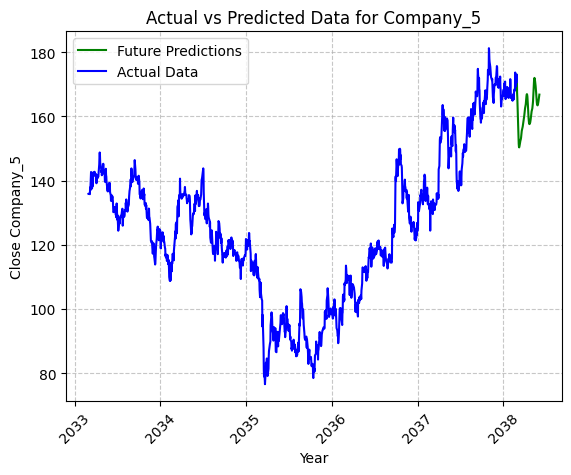

In [9]:
output_final = np.empty((96, 0))

for column_name in companies:
        print(f"Column: {column_name}")

        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(company_dataframes[column_name])


        n = scaled_data.shape[0]    # n = 1236
        training_size = int(n * 0.75)
        test_size = n - training_size
        train_data, test_data = scaled_data[0 : training_size, :], scaled_data[training_size : n, :]


        time_step = 150
        X_train, y_train = create_dataset(train_data, time_step)
        X_test, y_test = create_dataset(test_data, time_step)


        #Reshape data to fit in LSTM model
        y_train = y_train[:, 2]
        y_test = y_test[:, 2]
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 6)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 6)

        print(f"X_train Shape : {X_train.shape}"), print(f"y_train Shape : {y_train.shape}")
# ----------------------------------------------------------------------------------------------------------
        # COMMENTED CODE -> FULL MODEL
        # AFTER THIS COMMENTED CODE THERE IS LOADED MODEL

        """
        from tensorflow.keras.models import Sequential, save_model, load_model
        from tensorflow.keras.layers import *
        from tensorflow.keras.callbacks import EarlyStopping
        from tensorflow.keras.losses import MeanSquaredError
        from tensorflow.keras.metrics import RootMeanSquaredError
        from tensorflow.keras.optimizers import Adam

        model = Sequential()
        model.add(LSTM(128, activation='relu', input_shape=(time_step, 6), return_sequences=True))
        model.add(LSTM(64, activation='tanh', return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        from tensorflow.keras.callbacks import ModelCheckpoint

        # Define the checkpoint path
        checkpoint_path = f"model_checkpoint_{column_name}.h5"

        # Define the ModelCheckpoint callback
        checkpoint = ModelCheckpoint(checkpoint_path,
                                    monitor='val_loss',
                                    save_best_only=True,
                                    mode='min',
                                    verbose=1)

        early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)
        # Add the ModelCheckpoint callback to the list of callbacks in model.fit()
        history = model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=100,
                            callbacks=[early_stop, checkpoint])  # Add checkpoint here


        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)


        test_predict_new = np.repeat(test_predict, 6, axis=1)
        y_test_new = np.repeat(y_test.reshape(-1,1), 6, axis = 1)
        y_train_new = np.repeat(y_train.reshape(-1,1), 6, axis = 1)
        train_predict_new = np.repeat(train_predict, 6, axis=1)
        train_predict_og = scaler.inverse_transform(train_predict_new)[:,0]
        test_predict_og = scaler.inverse_transform(test_predict_new)[:,0]
        y_test_og = scaler.inverse_transform(y_test_new)[:, 0]
        y_train_og = scaler.inverse_transform(y_train_new)[:, 0]




        # PLOTTING THE PREDICTIONS
        trainPredictPlot = np.zeros(len(df1))
        trainPredictPlot[:] = np.nan
        trainPredictPlot[time_step:len(train_predict) + time_step] = train_predict_og
        # shift test predictions for plotting
        testPredictPlot = np.zeros(len(df1))
        testPredictPlot[:] = np.nan
        testPredictPlot[len(train_predict) + (time_step * 2) + 1:len(df1) - 1] = test_predict_og

        import matplotlib.pyplot as plt
        import pandas as pd
        # Assuming 'index' is the datetime index of your DataFrame
        index = pd.to_datetime(company_dataframes[column_name].index)
        # Extract the year from the datetime index
        years = index.year
        # Plot baseline and predictions with the year on the x-axis
        plt.plot(index, company_dataframes[column_name][f'Close_{column_name}'], color='b', label='Actual Data')
        plt.plot(index, trainPredictPlot, color='r', linestyle='--', label='Training Predictions')
        plt.plot(index, testPredictPlot, color='g', linestyle='--', label='Testing Predictions')
        plt.legend()
        # Set the x-axis ticks to be unique years
        unique_years = np.unique(years)
        plt.xticks(pd.to_datetime(unique_years, format='%Y'), unique_years, rotation=45)  # Adjust rotation as needed
        plt.xlabel('Year')
        plt.ylabel(f'Close {column_name}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'Actual vs Predicted Data for {column_name}')
        plt.show()



        import math
        from sklearn.metrics import mean_squared_error
        RMSE = math.sqrt(mean_squared_error(test_predict_og,y_test_og))
        print(f"{column_name} RMSE : {RMSE}")





        # Reshape the last sequence from the test set for prediction
        latest_sequence = X_test[-1].reshape(1, time_step, -1)

        # Generate predictions for the next 96 steps
        new_predictions = []

        for i in range(96):
            # Make a prediction for the next time step
            next_prediction = model.predict(latest_sequence.reshape(1, time_step, 6))[0, 0]
            print(f"Prediction {i + 1}: {next_prediction}")

            # Store the prediction
            new_predictions.append(next_prediction)

            # Update the latest sequence for the next prediction
            latest_sequence = np.roll(latest_sequence, -1, axis=1)

            # Replace the last Close price with the prediction
            latest_sequence[:, -1, 2] = next_prediction

        # Inverse transform the predictions
        predicted_values = np.repeat(np.array(new_predictions).reshape(-1, 1), 6, axis=1)
        actual_predictions = scaler.inverse_transform(predicted_values)[:, 0]


        output_final = np.hstack((output_final, actual_predictions.reshape(96,1)))





        # PLOTTING THE FORCAST
        forcast = np.zeros(len(df1) + 96)
        forcast[:] = np.nan
        forcast[-96:] = actual_predictions
        forcast[-97] = y_test_og[-1]

        import matplotlib.pyplot as plt
        import pandas as pd

        index = pd.to_datetime(company_dataframes[column_name].index)

        years = index.year
        index1 = index.copy()

        # Add the next 96 days to the new index
        index1 = index1.append(pd.date_range(start=index1[-1] + pd.DateOffset(1), periods=96))

        # Plot baseline and predictions with the year on the x-axis
        plt.plot(index1, forcast, color='g', label='Future Predictions')
        plt.plot(index, company_dataframes[column_name][f'Close_{column_name}'], color='b', label='Actual Data')
        plt.legend()

        # Set the x-axis ticks to be unique years
        unique_years = np.unique(years)
        plt.xticks(pd.to_datetime(unique_years, format='%Y'), unique_years, rotation=45)  # Adjust rotation as needed
        plt.xlabel('Year')
        plt.ylabel(f'Close {column_name}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'Actual vs Predicted Data for {column_name}')
        plt.show()
        """
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------
        # USE CHECKPOINT MODEL FROM HERE


        from tensorflow.keras.models import load_model
        loaded_model = load_model(f"model_checkpoint_{column_name}.h5")

        train_predict = loaded_model.predict(X_train)
        test_predict = loaded_model.predict(X_test)

        test_predict_new = np.repeat(test_predict, 6, axis=1)
        y_test_new = np.repeat(y_test.reshape(-1,1), 6, axis = 1)
        y_train_new = np.repeat(y_train.reshape(-1,1), 6, axis = 1)
        train_predict_new = np.repeat(train_predict, 6, axis=1)
        train_predict_og = scaler.inverse_transform(train_predict_new)[:,0]
        test_predict_og = scaler.inverse_transform(test_predict_new)[:,0]
        y_test_og = scaler.inverse_transform(y_test_new)[:, 0]
        y_train_og = scaler.inverse_transform(y_train_new)[:, 0]




        # PLOTTING THE PREDICTIONS
        trainPredictPlot = np.zeros(len(df1))
        trainPredictPlot[:] = np.nan
        trainPredictPlot[time_step:len(train_predict) + time_step] = train_predict_og
        # shift test predictions for plotting
        testPredictPlot = np.zeros(len(df1))
        testPredictPlot[:] = np.nan
        testPredictPlot[len(train_predict) + (time_step * 2) + 1:len(df1) - 1] = test_predict_og

        import matplotlib.pyplot as plt
        import pandas as pd
        # Assuming 'index' is the datetime index of your DataFrame
        index = pd.to_datetime(company_dataframes[column_name].index)
        # Extract the year from the datetime index
        years = index.year
        # Plot baseline and predictions with the year on the x-axis
        plt.plot(index, company_dataframes[column_name][f'Close_{column_name}'], color='b', label='Actual Data')
        plt.plot(index, trainPredictPlot, color='r', linestyle='--', label='Training Predictions')
        plt.plot(index, testPredictPlot, color='g', linestyle='--', label='Testing Predictions')
        plt.legend()
        # Set the x-axis ticks to be unique years
        unique_years = np.unique(years)
        plt.xticks(pd.to_datetime(unique_years, format='%Y'), unique_years, rotation=45)  # Adjust rotation as needed
        plt.xlabel('Year')
        plt.ylabel(f'Close {column_name}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'Actual vs Predicted Data for {column_name}')
        plt.show()



        import math
        from sklearn.metrics import mean_squared_error
        RMSE = math.sqrt(mean_squared_error(test_predict_og,y_test_og))
        print(f"{column_name} RMSE : {RMSE}")





        # Reshape the last sequence from the test set for prediction
        latest_sequence = X_test[-1].reshape(1, time_step, -1)

        # Generate predictions for the next 96 steps
        new_predictions = []

        for i in range(96):
            # Make a prediction for the next time step
            next_prediction = loaded_model.predict(latest_sequence.reshape(1, time_step, 6))[0, 0]
            print(f"Prediction {i + 1}: {next_prediction}")

            # Store the prediction
            new_predictions.append(next_prediction)

            # Update the latest sequence for the next prediction
            latest_sequence = np.roll(latest_sequence, -1, axis=1)

            # Replace the last Close price with the prediction
            latest_sequence[:, -1, 2] = next_prediction

        # Inverse transform the predictions
        predicted_values = np.repeat(np.array(new_predictions).reshape(-1, 1), 6, axis=1)
        actual_predictions = scaler.inverse_transform(predicted_values)[:, 0]


        output_final = np.hstack((output_final, actual_predictions.reshape(96,1)))





        # PLOTTING THE FORCAST
        forcast = np.zeros(len(df1) + 96)
        forcast[:] = np.nan
        forcast[-96:] = actual_predictions
        forcast[-97] = y_test_og[-1]

        import matplotlib.pyplot as plt
        import pandas as pd

        index = pd.to_datetime(company_dataframes[column_name].index)

        years = index.year
        index1 = index.copy()

        # Add the next 96 days to the new index
        index1 = index1.append(pd.date_range(start=index1[-1] + pd.DateOffset(1), periods=96))

        # Plot baseline and predictions with the year on the x-axis
        plt.plot(index1, forcast, color='g', label='Future Predictions')
        plt.plot(index, company_dataframes[column_name][f'Close_{column_name}'], color='b', label='Actual Data')
        plt.legend()

        # Set the x-axis ticks to be unique years
        unique_years = np.unique(years)
        plt.xticks(pd.to_datetime(unique_years, format='%Y'), unique_years, rotation=45)  # Adjust rotation as needed
        plt.xlabel('Year')
        plt.ylabel(f'Close {column_name}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'Actual vs Predicted Data for {column_name}')
        plt.show()


In [10]:
out = np.empty(96*6)
curr = 0
for i in range(96):
    for j in range(6):
        out[curr] = output_final[i, j]
        curr += 1
out[0], out[1]

(266.0024719238281, 98.42710876464844)

In [11]:
df_out = pd.DataFrame({"Id": np.arange(0, 96 * 6), "Close": out})
df_out.head()

,Id,Close
0,0,266.002472
1,1,98.427109
2,2,7.503191
3,3,102.401512
4,4,8619.347656


In [12]:
df_out.to_csv('Pred.csv', index = False)